<a href="https://colab.research.google.com/github/gizemkaratas/diabetes_project/blob/main/Diabetes_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ML (Random Forrest) ile Diyabet Hastalığı Tahminleme**

**Kütüphanelerin Tanımlanması:**

In [1]:
import numpy as np #numpy kütüphanesi veri işleme,analizi için ve matematiksel hesaplar için kullanılır.
import pandas as pd #pandas kütüphanesi veri manipülasyonu, karmaşık veri yapıları, veri dosyası okutma gibi amaçlarla kullanılır.
import matplotlib.pyplot as plt #veri görselleştirme için kullanılır (grafik vb.)
import seaborn as sns #veri görselleştirme için kullanılır daha karmaşık grafikler için kullanılır, kategorik grafikleştirme, hazır grafik temaları bulundurur.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score #model performansını ölçmek için kullanılır.
from sklearn.model_selection import train_test_split #modeli eğitirken kullanılan kütüphane
from sklearn.preprocessing import LabelEncoder #kategorik veriyi sayısal veriye çevirmek için kullanılması gereken kütüphane
from sklearn.ensemble import RandomForestClassifier # random forrest, gradient vb iki basit öğrenme modelini birleştirerek daha güçlü öğrenme modelleri oluşturmak için kullanılır
from sklearn.preprocessing import StandardScaler #veri ön işleme için kullanılır veri standartlaştırma, normalizasyon vb
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

**Ayarların Tanımlanması:**

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', 20)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import warnings # warnigsten gelen basit hataların göz ardı edilmesi için kullanılır.
warnings.simplefilter(action="ignore")

**Veri Setinin Tanımlaması:**

In [3]:
df = pd.read_csv("diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


In [5]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

**Sınıflandırma**

In [6]:
# sınıf olarak ekleme yapacağız ki makine daha iyi tahminde bulunsun
# Normal: Açlık kan şekeri seviyesi 70-100 mg/dL arasındadır.
# Prediyabet: 100-125 mg/dL.
# Diyabet: 126 mg/dL ve üzeri.
# bunlar dışındakilerde anormal

def siniflandir(kan_sekeri):
  if 70 <= kan_sekeri <= 100:
    return 0
  elif 100 < kan_sekeri <= 125:
    return 1
  elif kan_sekeri >= 126:
    return 2
  else:
    return 3

df["Sinif"] = df["Glucose"].apply(siniflandir)
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Sinif
0,6,148,72,35,0,33.600,0.627,50,1,2
1,1,85,66,29,0,26.600,0.351,31,0,0
2,8,183,64,0,0,23.300,0.672,32,1,2
3,1,89,66,23,94,28.100,0.167,21,0,0
4,0,137,40,35,168,43.100,2.288,33,1,2


In [7]:
# bloddPressure için sınıflandırma
# Normal: Sistolik kan basıncı 90-120 mmHg.
# Yüksek Tansiyon (Hipertansiyon): Sistolik kan basıncı 140 mmHg ve üzeri.
# Prehipertansiyon: Sistolik kan basıncı 120-139 mmHg.
# Düşük Tansiyon (Hipotansiyon): Sistolik kan basıncı 90 mmHg'nin altı.

def tansiyon_siniflandir(pressure):
  if pressure < 90:
    return 0
  elif 90 <= pressure <= 120:
    return 1
  elif 120 < pressure <= 139:
    return 2
  else:
    return 3

df["Tansiyon_Sinifi"] = df["BloodPressure"].apply(tansiyon_siniflandir)
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Sinif,Tansiyon_Sinifi
0,6,148,72,35,0,33.600,0.627,50,1,2,0
1,1,85,66,29,0,26.600,0.351,31,0,0,0
2,8,183,64,0,0,23.300,0.672,32,1,2,0
3,1,89,66,23,94,28.100,0.167,21,0,0,0
4,0,137,40,35,168,43.100,2.288,33,1,2,0


In [8]:
# Bu özellik diyabetin ailedeki yaygınlığı için de sınıflandırma 0 ile 2 arasında değer alır.
# Yüksek değerler (1'in üzeri) diyabet riskinin yüksek olduğunu gösterir.

def diyabet_yayginligi(deger):
  if deger < 1:
    return 0
  else:
    return 1

df["Diyabet_Yayginligi_Sinifi"] = df["DiabetesPedigreeFunction"].apply(diyabet_yayginligi)
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Sinif,Tansiyon_Sinifi,Diyabet_Yayginligi_Sinifi
0,6,148,72,35,0,33.600,0.627,50,1,2,0,0
1,1,85,66,29,0,26.600,0.351,31,0,0,0,0
2,8,183,64,0,0,23.300,0.672,32,1,2,0,0
3,1,89,66,23,94,28.100,0.167,21,0,0,0,0
4,0,137,40,35,168,43.100,2.288,33,1,2,0,1


**Aykırı Değer Tespiti:**

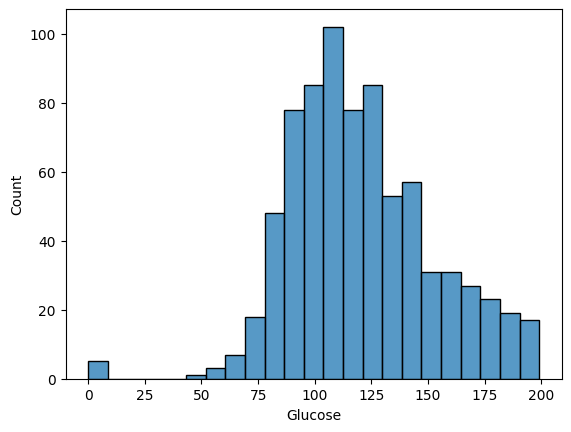

In [9]:
# Glucose'un dağılımı:

sns.histplot(df["Glucose"], kde=False);


In [10]:
#Glikozun 0 değerleri nan değere çevireceğiz sonra da ortalama ile dolduracağız.
df["Glucose"].replace(0, np.nan, inplace=True)

In [11]:
#Diyabet olup olmama durumu ortalama değeri etkilediği için buna göre gruplayıp ortalamayı 1 ve 0 a göre iki ayrı sınıfa göre aldık. ve boş değerleri doldurduk
df.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Sinif,Tansiyon_Sinifi,Diyabet_Yayginligi_Sinifi
Outcome,,,,,,,,,,,
0,3.298,110.644,68.184,19.664,68.792,30.304,0.430,31.190,0.938,0.064,0.044
1,4.866,142.320,70.825,22.164,100.336,35.143,0.550,37.067,1.604,0.108,0.108


In [12]:
#  outcome'ı 0 olanların glucose'unu 110.644 ile 1 olanları da 142.320 ile doldur

df.loc[df["Outcome"] == 0, "Glucose"] = df.loc[df["Outcome"] == 0, "Glucose"].fillna(110.644)
df.loc[df["Outcome"] == 1, "Glucose"] = df.loc[df["Outcome"] == 1, "Glucose"].fillna(142.320)


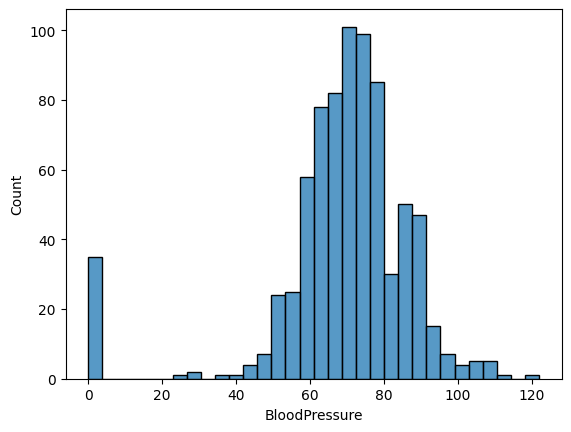

In [13]:
#  BloodPressure'un dağılımı:

sns.histplot(df["BloodPressure"], kde=False);


In [14]:
df.BloodPressure.replace(0, np.nan, inplace=True)

In [15]:
#  outcome'ı 0 olanların BloodPressure 70.877 ile 1 olanları da 75.321 ile doldur

df.loc[df["Outcome"] == 0, "BloodPressure"] = df.loc[df["Outcome"] == 0, "BloodPressure"].fillna(70.877)
df.loc[df["Outcome"] == 1, "BloodPressure"] = df.loc[df["Outcome"] == 1, "BloodPressure"].fillna(75.321)


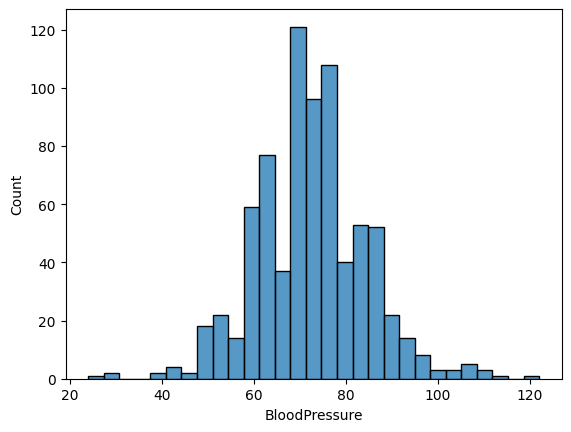

In [16]:
# BloodPressure'un dağılımı:

sns.histplot(df["BloodPressure"], kde=False);


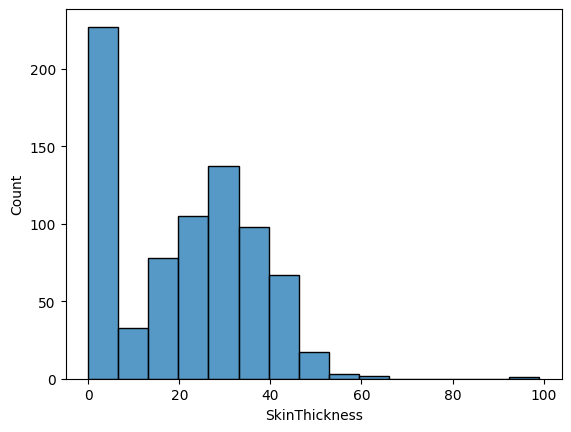

In [17]:
# SkinThickness'in dağılımı: (bu değerler 0 olamaz 0 aslında nan değer bu sebeple 0 ları tespit edip yerine ortalamayla dolduruyoruz)

sns.histplot(df["SkinThickness"], kde=False);


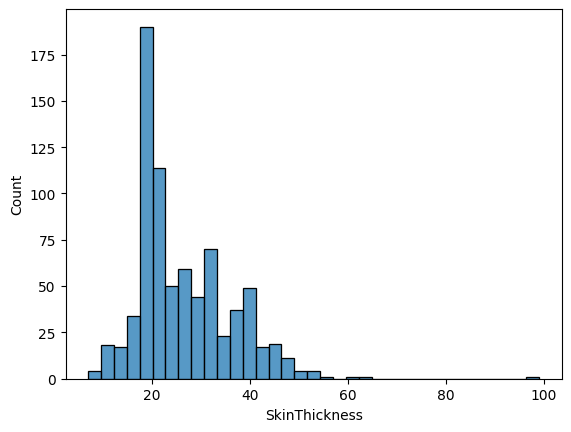

In [18]:
#  Outcome ı 0 olanların SkinThicknessini 19.644 1 olanları ise 22.164 ile doldur

df.SkinThickness.replace(0, np.nan, inplace=True)

df.loc[df["Outcome"] == 0, "SkinThickness"] = df.loc[df["Outcome"] == 0, "SkinThickness"].fillna(19.644)
df.loc[df["Outcome"] == 1, "SkinThickness"] = df.loc[df["Outcome"] == 1, "SkinThickness"].fillna(22.164)

sns.histplot(df["SkinThickness"], kde=False);


In [19]:
#diğer değişkenler içinde aynı işlemleri tekrarlayalım
df.Insulin.replace(0, np.nan, inplace=True)

df.loc[df["Outcome"] == 0, "Insulin"] = df.loc[df["Outcome"] == 0, "Insulin"].fillna(68.792)
df.loc[df["Outcome"] == 1, "Insulin"] = df.loc[df["Outcome"] == 1, "Insulin"].fillna(100.335)

df.BMI.replace(0, np.nan, inplace=True)

df.loc[df["Outcome"] == 0, "BMI"] = df.loc[df["Outcome"] == 0, "BMI"].fillna(30.304)
df.loc[df["Outcome"] == 1, "BMI"] = df.loc[df["Outcome"] == 1, "BMI"].fillna(35.142)

df.DiabetesPedigreeFunction.replace(0, np.nan, inplace=True)

df.loc[df["Outcome"] == 0, "DiabetesPedigreeFunction"] = df.loc[df["Outcome"] == 0, "DiabetesPedigreeFunction"].fillna(0.429)
df.loc[df["Outcome"] == 1, "DiabetesPedigreeFunction"] = df.loc[df["Outcome"] == 1, "DiabetesPedigreeFunction"].fillna(0.550)

df.Age.replace(0, np.nan, inplace=True)

df.loc[df["Outcome"] == 0, "Age"] = df.loc[df["Outcome"] == 0, "Age"].fillna(31.190)
df.loc[df["Outcome"] == 1, "Age"] = df.loc[df["Outcome"] == 1, "Age"].fillna(37.067)




**Standartlaştırma İşlemi:**

In [20]:
def standardize_features(df):
  if  "Outcome" in df.columns:
    features = df.drop("Outcome", axis=1)
  else:
    features = df
  scaler = StandardScaler()
  standardized_features = scaler.fit_transform(features)
  standardized_df = pd.DataFrame(standardized_features, columns=features.columns)
  if "Outcome" in df.columns:
    standardized_df["Outcome"] = df["Outcome"]
  return standardized_df

standardized_df = standardize_features(df)
standardized_df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Sinif,Tansiyon_Sinifi,Diyabet_Yayginligi_Sinifi,Outcome
0,0.640,0.864,-0.035,0.869,-0.199,0.169,0.468,1.426,0.992,-0.289,-0.267,1
1,-0.845,-1.205,-0.531,0.246,-0.537,-0.849,-0.365,-0.191,-1.400,-0.289,-0.267,0
2,1.234,2.014,-0.697,-0.464,-0.199,-1.329,0.604,-0.106,0.992,-0.289,-0.267,1
3,-0.845,-1.074,-0.531,-0.377,-0.267,-0.631,-0.921,-1.042,-1.400,-0.289,-0.267,0
4,-1.142,0.503,-2.680,0.869,0.524,1.550,5.485,-0.020,0.992,-0.289,3.750,1


**Modelin Oluşturulması ve Eğitilmesi:**

In [21]:
# Hedef değişkeni ve özellikleri ayıklama
y = df['Outcome']
X = df.drop('Outcome', axis=1)

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeli başlatma
rf = RandomForestClassifier(random_state=42, n_estimators=200, min_samples_split=10)

# Modeli eğitim verisi üzerinde eğitme
rf.fit(X_train, y_train)

# Tahmin yapma
y_pred = rf.predict(X_test)


**Modelin Performansını Değerlendirme:**

In [22]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
# Metrikleri ekrana yazdırma
print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

Model Evaluation Metrics:
Accuracy: 0.8896
Precision: 0.8519
Recall: 0.8364
F1 Score: 0.8440
ROC-AUC: 0.8778


**Uygulama:** (değerlerinizi girerek deneyebilirsiniz)

In [23]:
#kullanıcıdan input alıyoruz. enter girdiğinde hata vermek yerine ortalama ile dolduruyoruz. sınıflandırmayı kullanıcıdan almak yerine kendisi atayacak sonuç olarak diyabet olup olmadığını tahmin ediyoruz
def get_user_input(prompt, default_value):
  try:
    value = input(prompt)
    if value == '':
      return default_value
    return float(value)
  except ValueError:
    print("Geçersiz giriş. Varsayılan değer kullanılıyor.")
    return default_value

# Kullanıcıdan girdi al
age = int(get_user_input("Yaşınızı girin: ", df["Age"].mean()))
glucose = get_user_input("Kan şekeri seviyenizi girin: ", df["Glucose"].mean())
blood_pressure = get_user_input("Kan basıncınızı girin: ", df["BloodPressure"].mean())
skin_thickness = get_user_input("Deri kalınlığınızı girin: ", df["SkinThickness"].mean())
insulin = get_user_input("İnsülin seviyenizi girin: ", df["Insulin"].mean())
bmi = get_user_input("Vücut kitle indeksinizi (BMI) girin:", df["BMI"].mean())
diabetes_pedigree_function = get_user_input("Diyabet soyağacı fonksiyonunuzu girin: ", df["DiabetesPedigreeFunction"].mean())
pregnancies = int(get_user_input("Geçmiş gebelik sayısını girin: ", df["Pregnancies"].mean()))

# Sınıfları belirle
sinif = siniflandir(glucose)
tansiyon_sinifi = tansiyon_siniflandir(blood_pressure)
diyabet_yayginligi_sinifi = diyabet_yayginligi(diabetes_pedigree_function)

# Kullanıcı girdilerini bir veri çerçevesine dönüştür
user_data = pd.DataFrame({
    'Pregnancies': [pregnancies],
    'Glucose': [glucose],
    'BloodPressure': [blood_pressure],
    'SkinThickness': [skin_thickness],
    'Insulin': [insulin],
    'BMI': [bmi],
    'DiabetesPedigreeFunction': [diabetes_pedigree_function],
    'Age': [age],
    "Sinif": [sinif],
    "Tansiyon_Sinifi": [tansiyon_sinifi],
    "Diyabet_Yayginligi_Sinifi": [diyabet_yayginligi_sinifi]
})

# Modeli kullanarak tahmin yap
prediction = rf.predict(user_data)

# Sonucu yazdır
if prediction[0] == 0:
    print("Diyabet hastası olma olasılığınız düşük.")
else:
    print("Diyabet hastası olabilirsiniz. Lütfen bir doktora danışın.")


Yaşınızı girin: 27
Kan şekeri seviyenizi girin: 89
Kan basıncınızı girin: 66
Deri kalınlığınızı girin: 23
İnsülin seviyenizi girin: 94
Vücut kitle indeksinizi (BMI) girin:28.100
Diyabet soyağacı fonksiyonunuzu girin: 0.167
Geçmiş gebelik sayısını girin: 0
Diyabet hastası olma olasılığınız düşük.
